<a href="https://colab.research.google.com/github/Daksaweaomegg10/AI_ML/blob/main/Models_From_Scratch/K_Nearest_Neighbors_Classifier__KNN_fromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Euclidean Distance

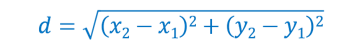

Manhattan Distance

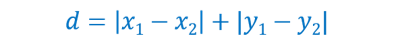

In [ ]:
#imporitng dependecies
import numpy as np
import statistics

In [ ]:
class KNN_Classifier():

  # initiating the parameters
  def __init__(self, distance_metric):

    self.distance_metric = distance_metric

  # getting the distance metric
  def get_distance_metric(self,training_data_point, test_data_point):

    if (self.distance_metric == 'euclidean'):

      dist = 0
      for i in range(len(training_data_point) - 1):
        dist = dist + (training_data_point[i] - test_data_point[i])**2

      euclidean_dist = np.sqrt(dist)

      return euclidean_dist

    elif (self.distance_metric == 'manhattan'):

      dist = 0

      for i in range(len(training_data_point) - 1):
        dist = dist + abs(training_data_point[i] - test_data_point[i])

      manhattan_dist = dist

      return manhattan_dist

  # getting the nearest neighbors
  def nearest_neighbors(self,X_train, test_data, k):

    distance_list = []

    for training_data in X_train:

      distance = self.get_distance_metric(training_data, test_data)
      distance_list.append((training_data, distance))

    distance_list.sort(key=lambda x: x[1])

    neighbors_list = []

    for j in range(k):
      neighbors_list.append(distance_list[j][0])

    return neighbors_list


  # predict the class of the new data point:
  def predict(self,X_train, test_data, k):
    neighbors = self.nearest_neighbors(X_train, test_data, k)

    for data in neighbors:
      label = []
      label.append(data[-1])

    predicted_class = statistics.mode(label)

    return predicted_class

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('/content/diabetes (2).csv')

In [ ]:
# separating features and Target
X = diabetes_dataset.drop(columns='Outcome', axis = 1)
Y = diabetes_dataset['Outcome']

In [ ]:
# converting the data to numpy array
X = X.to_numpy()
Y = Y.to_numpy()

In [ ]:
# train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [ ]:
X_train = np.insert(X_train, 8, Y_train, axis=1)

X_train --> training data with features and target

X_test  --> test data without target

In [ ]:
#using KNN custom class

In [ ]:
classifier = KNN_Classifier(distance_metric='manhattan')
prediction = classifier.predict(X_train, X_test[2], k=7)

In [ ]:
print(X_test[2])

[  5.    147.     78.      0.      0.     33.7     0.218  65.   ]


In [ ]:
print(Y_test[2])# answer jo hona chhahiye

0


In [ ]:
print(prediction)

0.0


In [ ]:
X_test_size = X_test.shape[0]
print(X_test_size)

154


In [ ]:
y_pred = []

for i in range(X_test_size):
  prediction = classifier.predict(X_train, X_test[i], k=5)
  y_pred.append(prediction)

In [ ]:
print(y_pred)

[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0]


In [ ]:
y_true = Y_test
accuracy = accuracy_score(y_true, y_pred)

In [ ]:
print(accuracy*100)# changes with k value

74.02597402597402


In [ ]:
# Now comapring with orignal model

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('/content/diabetes (2).csv')

In [ ]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [ ]:
# separating features and Target
X = diabetes_dataset.drop(columns='Outcome', axis = 1)
Y = diabetes_dataset['Outcome']

In [ ]:
# train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Model Training

KNN Classifier in Sklearn

In [ ]:
#p=1 for Manhattan and p=2 Euclidiean
classifier = KNeighborsClassifier(p=1)

In [ ]:
classifier.fit(X_train, Y_train)

KNeighborsClassifier(p=1)

Model Evaluation

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(Y_test, y_pred)

In [ ]:
print(accuracy*100)

77.92207792207793
